# Análise de Dados dos salários dos servidores públicos do Estado do Ceará em Dezembro de 2018

Esta é uma análise inicial e ainda em andamento, feita como exercício. Vamos ver o que conseguimos descobrir! Comentários são bem vindos. <br>
O dataset utilizado é público e pode ser baixado no portal [Ceará Transparente](https://cearatransparente.ce.gov.br/)

In [47]:
import numpy as np
import pandas as pd

In [48]:
#importando os dados
data = pd.read_csv('servidores_2018.csv',sep=';', encoding='latin-1')


In [49]:
#vamos ver a cara do nosso dataset
data

,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
0,ANASTACIA DA SILVA SANTOS,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,7670.57,1622.41,6048.16,19670.02,11999.45,0.0
1,ANTONIO MARCONI LEMOS DA SILVA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,21503.08,15878.26,5624.82,33485.87,11982.79,0.0
2,ANTONIO SERGIO BELTRAO MAFRA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14427.69,8458.24,5969.45,26065.85,11638.16,0.0
3,CARLOS EDUARDO GUIMARAES LOPES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15950.64,4675.68,11274.96,29711.05,13760.41,0.0
4,DENISE ANDRADE ARAUJO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15857.24,6022.48,9834.76,24102.25,8245.01,0.0
5,EMERSON CARVALHO DE LIMA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11472.58,4675.68,6796.90,22283.29,10810.71,0.0
6,GEORGE DANTAS NUNES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11939.23,5677.29,6261.94,23284.90,11345.67,0.0
7,KELLY DARLANE NEPOMUCENO RAMOS,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14623.00,9042.89,5580.11,26650.50,12027.50,0.0
8,LUANDA MARIA DE FIGUEIREDO LOURENCO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11241.22,4675.68,6565.54,24876.10,13634.88,0.0
9,MARCELO DE SOUSA MONTEIRO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11972.70,6248.22,5724.48,24693.33,12720.63,0.0


Vemos que nesta tabela existem alguns servidores inativos. Vamos trabalhar apenas com os ativos.

In [50]:
ativo = data[data['Situação funcional'] == 'Ativo']

In [51]:
#vamos ver um pouco sobre as estatísticas desse datasete
ativo.describe()

,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
count,101110.000000,101110.000000,101110.000000,101110.000000,101110.000000,101110.000000
mean,1530.169182,31.660761,1498.508421,4498.740594,2968.571412,12.167511
std,2382.744843,449.288728,2220.107640,4708.724047,2631.234703,397.208459
min,0.000000,0.000000,0.000000,20.160000,0.000000,0.000000
25%,224.770000,0.000000,224.770000,1592.207500,1288.512500,0.000000
50%,857.835000,0.000000,856.825000,3800.820000,2506.785000,0.000000
75%,1957.592500,0.000000,1955.505000,5550.032500,3708.780000,0.000000
max,38681.050000,28178.100000,30537.530000,76445.200000,40824.620000,81078.370000


Ok, parece que em média o servidor público ganha bem. Mas pera lá... o salário líquido mínimo é R$ 0,00? Como é isso? Vamos voltar a essa questão depois. Primeiro, a maior curiosidade: quem ganha mais?

In [52]:
#quem será o servidor público que mais (salário líquido)?
ativo[ativo["Salário líquido"] == ativo["Salário líquido"].max()]

,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
11765,CESAR OLIVEIRA DE BARROS LEAL,PGE,PROCURADOR DO ESTADO,Ativo,30784.38,11029.57,19754.81,71609.0,40824.62,0.0


Cacilda, é muito dinheiro! E quem diria, eu achava que o Governador do Estado era quem ganhava mais. Bom, tem muita coisa que eu não entendo. Mas vamos fuçar um pouco mais. Por exemplo, vamos tentar separar as tabelas por gênero. Como não existe essa informação na tabela, vamos ter que criar uma função que faça essa inferência de alguma forma. Uma função ingênua seria tentar separar pela terminação do nome, mas é difícil listar todas as possibilidades de terminação de nomes. Além disso existem ambiguidades, como os nomes terminados em 'y'. Uma forma mais inteligente seria comparar o primeiro nome com a base de dados do censo do IBGE e ver qual o sexo mais comum para aquele nome, mas deixemos isso para outro momento. Por enquanto vamos nos ater ao algoritmo ingênuo e ter uma tolerância ao erro. Vamos dar uma olhada no padrão de terminação dos nomes e pensar na função. Antes que alguém fale, não, não estou considerando as subjetividades das questões de gênero aqui, ok? Desculpem, é uma análise simples que estou fazendo no fim de semana.   

In [53]:
ativo['Servidor'].head(200)

0                 ANASTACIA DA SILVA SANTOS
1            ANTONIO MARCONI LEMOS DA SILVA
2              ANTONIO SERGIO BELTRAO MAFRA
3            CARLOS EDUARDO GUIMARAES LOPES
4                     DENISE ANDRADE ARAUJO
5                  EMERSON CARVALHO DE LIMA
6                       GEORGE DANTAS NUNES
7            KELLY DARLANE NEPOMUCENO RAMOS
8       LUANDA MARIA DE FIGUEIREDO LOURENCO
9                 MARCELO DE SOUSA MONTEIRO
10          PAULO ROBERTO DE CARVALHO NUNES
11             VALERIA FERREIRA LIMA LEITAO
12                      AGLAIO SOARES GOMES
13       KELLY CRISTINA DE OLIVEIRA BARBOSA
14         MICHELLE BORGES CAVALCANTE CUNHA
15                WILMA MARQUES DE OLIVEIRA
16                          WLADIS PINHEIRO
17              SILVIA HELENA CORREIA VIDAL
18                ADRIANA OLIVEIRA NOGUEIRA
19                ADRIENNE FIUZA GIAMPIETRO
20                   ANTONIO PAULO DA SILVA
21           CARLOS RUBENS MOREIRA DA SILVA
22         DIMONA ALBUQUERQUE AR

In [54]:
#retorna true se o primeiro nome termina com essas substrings. true = F, false = M.
def classifica_genero(nome):
    first = nome.split()[0]
    if first == 'ANDRE' or first == 'JOSE' or first == 'JOSUE' or first == 'TOME' or first == 'GEORGE' or first.endswith('EY'):
        return False
    return first.endswith(('A','Y','E'))


In [55]:
#vamos testar
cara = 'ANTONIO REGIS BATISTA DE OLIVEIRA'
cara.split()[0]

'ANTONIO'

In [56]:
#até aqui ok. sabemos que não será 100% de acerto
first = cara.split()[0]
classifica_genero(first)

False

In [57]:
#vamos criar uma tabela só com as mulheres
mulheres = ativo[ativo['Servidor'].apply(classifica_genero)]
mulheres

,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
0,ANASTACIA DA SILVA SANTOS,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,7670.57,1622.41,6048.16,19670.02,11999.45,0.00
4,DENISE ANDRADE ARAUJO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15857.24,6022.48,9834.76,24102.25,8245.01,0.00
7,KELLY DARLANE NEPOMUCENO RAMOS,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14623.00,9042.89,5580.11,26650.50,12027.50,0.00
8,LUANDA MARIA DE FIGUEIREDO LOURENCO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11241.22,4675.68,6565.54,24876.10,13634.88,0.00
11,VALERIA FERREIRA LIMA LEITAO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,10843.71,3358.18,7485.53,27954.39,17110.68,0.00
13,KELLY CRISTINA DE OLIVEIRA BARBOSA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14891.82,6248.22,8643.60,31807.77,16915.95,0.00
14,MICHELLE BORGES CAVALCANTE CUNHA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,8593.08,2877.18,5715.90,20484.79,11891.71,0.00
15,WILMA MARQUES DE OLIVEIRA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,9847.85,4131.95,5715.90,21739.56,11891.71,0.00
17,SILVIA HELENA CORREIA VIDAL,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,8943.47,1021.06,7922.41,18628.67,9685.20,0.00
18,ADRIANA OLIVEIRA NOGUEIRA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15668.68,5123.56,10545.12,22731.17,7062.49,0.00


Até onde vi, parece ter funcionado. Ok, agora vamos pegar uma tabela com os homens.

In [58]:
homens = ativo[~ativo['Servidor'].apply(classifica_genero)]
homens

,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
1,ANTONIO MARCONI LEMOS DA SILVA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,21503.08,15878.26,5624.82,33485.87,11982.79,0.0
2,ANTONIO SERGIO BELTRAO MAFRA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14427.69,8458.24,5969.45,26065.85,11638.16,0.0
3,CARLOS EDUARDO GUIMARAES LOPES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15950.64,4675.68,11274.96,29711.05,13760.41,0.0
5,EMERSON CARVALHO DE LIMA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11472.58,4675.68,6796.90,22283.29,10810.71,0.0
6,GEORGE DANTAS NUNES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11939.23,5677.29,6261.94,23284.90,11345.67,0.0
9,MARCELO DE SOUSA MONTEIRO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11972.70,6248.22,5724.48,24693.33,12720.63,0.0
10,PAULO ROBERTO DE CARVALHO NUNES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,32751.23,22449.60,10301.63,40057.21,7305.98,0.0
12,AGLAIO SOARES GOMES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,10931.05,2331.45,8599.60,19939.06,9008.01,0.0
16,WLADIS PINHEIRO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,10343.62,4675.68,5667.94,22283.29,11939.67,0.0
20,ANTONIO PAULO DA SILVA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,10477.98,4675.68,5802.30,23120.79,12642.81,0.0


Beleza, vamos fazer uma análise exploratória básica das duas tabelas e ver o que conseguimos descobrir.

In [59]:
mulheres.describe()

,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
count,46705.000000,46705.000000,46705.000000,46705.000000,46705.000000,46705.000000
mean,1146.224401,19.821057,1126.403344,3761.867117,2615.642716,6.428875
std,2047.390317,303.729887,1943.653413,4317.828474,2513.177393,159.023349
min,0.000000,0.000000,0.000000,20.160000,0.000000,0.000000
25%,137.580000,0.000000,137.580000,1278.370000,1145.460000,0.000000
50%,499.930000,0.000000,499.530000,2600.320000,1992.440000,0.000000
75%,1373.550000,0.000000,1372.920000,4941.770000,3337.240000,0.000000
max,37224.340000,28178.100000,30162.390000,65180.760000,39695.910000,15673.980000


In [60]:
homens.describe()

,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias
count,54405.000000,54405.000000,54405.000000,54405.000000,54405.000000,54405.000000
mean,1859.773833,41.824779,1817.949054,5131.323551,3271.549719,17.093951
std,2591.867643,543.815812,2386.677203,4933.074627,2691.871299,521.018040
min,0.000000,0.000000,0.000000,23.760000,0.000000,0.000000
25%,366.350000,0.000000,366.350000,2415.960000,1786.820000,0.000000
50%,1397.240000,0.000000,1395.620000,4434.370000,2803.050000,0.000000
75%,2273.410000,0.000000,2270.470000,5850.390000,3890.820000,0.000000
max,38681.050000,26579.530000,30537.530000,76445.200000,40824.620000,81078.370000


In [61]:
print("Média de salário líquido das mulheres:% .2f" %(mulheres['Salário líquido'].mean()))
print("Média de salário líquido dos homens:% .2f" %(homens['Salário líquido'].mean()))
print("Em média os homens ganham R$ %.2f a mais que mulheres" %(homens['Salário líquido'].mean()-mulheres['Salário líquido'].mean()))

print()

print("Máximo de salário líquido das mulheres: ",mulheres['Salário líquido'].max())
print("Máximo de salário líquido dos homens: ",homens['Salário líquido'].max())
print("A diferença entre o salário máximo dos homens e o máximo das mulheres é R$ %.2f" %(homens['Salário líquido'].max()-mulheres['Salário líquido'].max()))

Média de salário líquido das mulheres: 2615.64
Média de salário líquido dos homens: 3271.55
Em média os homens ganham R$ 655.91 a mais que mulheres

Máximo de salário líquido das mulheres:  39695.91
Máximo de salário líquido dos homens:  40824.62
A diferença entre o salário máximo dos homens e o máximo das mulheres é R$ 1128.71


Dizem que uma imagem vale mais que mil palavras, então vamos tentar visualizar a diferença entre os dois grupos. Para ficar mais fácil, vamos criar uma nova função para criar uma tabela que contém homens e mulheres e os dividir através de um novo atributo chamado sexo, que pode ser M ou F

In [62]:
import seaborn as sns
%matplotlib inline

In [63]:
def genero(nome):
    first = nome.split()[0]
    sex = ''
    if first == 'ANDRE' or first == 'JOSE' or first == 'JOSUE' or first == 'TOME' or first == 'GEORGE' or first.endswith('EY'):
        sex = 'M'
    if first.endswith(('A','Y','E')):
        sex = 'F'
    else:
        sex = 'M'
    return sex

In [64]:
ativo_com_genero = ativo
ativo_com_genero['Sexo'] = ativo['Servidor'].apply(genero)
ativo_com_genero

/home/cabral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias,Sexo
0,ANASTACIA DA SILVA SANTOS,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,7670.57,1622.41,6048.16,19670.02,11999.45,0.0,F
1,ANTONIO MARCONI LEMOS DA SILVA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,21503.08,15878.26,5624.82,33485.87,11982.79,0.0,M
2,ANTONIO SERGIO BELTRAO MAFRA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14427.69,8458.24,5969.45,26065.85,11638.16,0.0,M
3,CARLOS EDUARDO GUIMARAES LOPES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15950.64,4675.68,11274.96,29711.05,13760.41,0.0,M
4,DENISE ANDRADE ARAUJO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,15857.24,6022.48,9834.76,24102.25,8245.01,0.0,F
5,EMERSON CARVALHO DE LIMA,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11472.58,4675.68,6796.90,22283.29,10810.71,0.0,M
6,GEORGE DANTAS NUNES,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11939.23,5677.29,6261.94,23284.90,11345.67,0.0,F
7,KELLY DARLANE NEPOMUCENO RAMOS,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,14623.00,9042.89,5580.11,26650.50,12027.50,0.0,F
8,LUANDA MARIA DE FIGUEIREDO LOURENCO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11241.22,4675.68,6565.54,24876.10,13634.88,0.0,F
9,MARCELO DE SOUSA MONTEIRO,CGE,AUDITOR DE CONTROLE INTERNO,Ativo,11972.70,6248.22,5724.48,24693.33,12720.63,0.0,M


Só um probleminha. Esse dataset tem 101.110 servidores. É muito dado pra visualizar de uma vez. Como minha máquina é humilde, vamos colher uma amostra aleatória de, digamos, 5.000 servidores, o que corresponde a cerca de 5% do total. Me parece razoável!

In [70]:
rand = ativo_com_genero.sample(n=1000)

Feito isso, vamos tentar visualizar os salários por gênero em um scatter plot de enxame. Cada pontinho representa um salário.

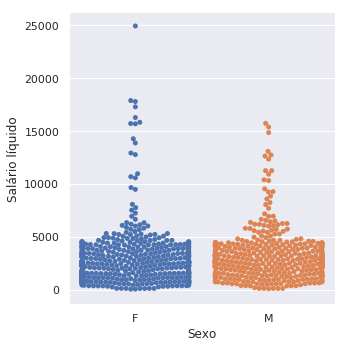

In [71]:
sns.set()
sns.catplot(x="Sexo", y="Salário líquido", kind="swarm", data=rand);

Ok, não parece tão discrepante. Mas precisamos lembrar que isto é uma amostra. Vamos tentar um boxplot:

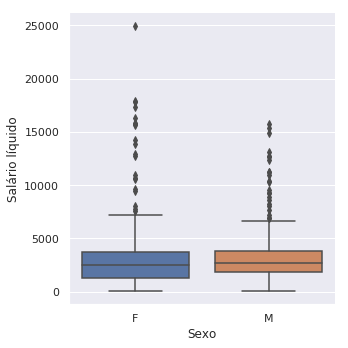

In [72]:
sns.catplot(x="Sexo", y="Salário líquido", kind="box", data=rand);

Já vimos quem ganha mais, mas e quem ganha menos. Será se tem algo interessante a descobrir aí?

In [73]:
#10 funcionários com menores salários liquidos
ativo_com_genero.sort_values('Salário líquido', ascending= True).head(10)

,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias,Sexo
362,JOSE ALBER MONTEIRO CAMPOS,SSPDS,NaN,Ativo,379.41,0.0,379.41,379.41,0.0,0.0,F
86528,MARIA PINHEIRO DE LIMA,SESA,AUXILIAR DE ENFERMAGEM,Ativo,1221.05,0.0,1221.05,1221.05,0.0,0.0,F
87666,MARIA SONIA SILVA DE SOUZA,SESA,AUXILIAR DE ENFERMAGEM,Ativo,1155.05,0.0,1155.05,1155.05,0.0,0.0,F
7275,MARIA LUCIA MENDES DE SOUSA,SESA-ACS,AG COMUN SAUDE,Ativo,1278.37,0.0,1278.37,1278.37,0.0,0.0,F
86936,IARA MARIA GALVAO SILVA,SESA,AUXILIAR DE ENFERMAGEM,Ativo,1221.05,0.0,1221.05,1221.05,0.0,0.0,F
88331,SERGUEY MALAQUIAS DE ALMEIDA,SESA,MEDICO,Ativo,6107.85,0.0,6107.85,6107.85,0.0,0.0,F
123840,RITA DE CASSIA ANDRADE NEIVA SANTOS,FUNECE,PROFESSOR,Ativo,5074.02,0.0,5074.02,5074.02,0.0,0.0,F
88035,FRANCISCO CORACY CARNEIRO MONTEIRO,SESA,MEDICO,Ativo,6507.43,0.0,6507.43,6507.43,0.0,0.0,M
6351,PEDRO LEAL DE SOUSA,SESA-ACS,AG COMUN SAUDE,Ativo,1278.37,0.0,1278.37,1278.37,0.0,0.0,M
123897,SHEILA MARCIA DE ARAUJO FONTENELE,FUNECE,PROFESSOR,Ativo,3942.97,0.0,3942.97,3942.97,0.0,0.0,F


Olha só, são aqueles com salário líquido de R$ 0,00. Porque isso acontece? Será que a pessoa não foi paga nesse mês? Aberto a discussão. Vejamos também os menores salários brutos:

In [74]:
#10 funcionários com menores salários liquidos
ativo_com_genero.sort_values('Salário bruto', ascending= True).head(10)

,Servidor,Órgão/Entidade,Cargo/Função/Emprego,Situação funcional,Total descontos,Abatimento em função do 'teto' constitucional,Outros descontos,Salário bruto,Salário líquido,Diárias,Sexo
168862,MAYARA EDIEN RODRIGUES DA SILV,SEDUC-CPTD,PROF CTPD LP,Ativo,1.61,0.0,1.61,20.16,18.55,0.0,F
166671,RAFAEL MARTINS NOGUEIRA,SEDUC-CPTD,PROF CTPD 7 SEM,Ativo,1.90,0.0,1.90,23.76,21.86,0.0,M
168389,ELI CRISTINA GONCALVES FERNANDES,SEDUC-CPTD,PROF CTPD LP,Ativo,1.97,0.0,1.97,24.65,22.68,0.0,M
82575,TEREZA CRISTINA LINS DE VASCONCELOS,SESA,NaN,Ativo,0.00,0.0,0.00,37.50,37.50,0.0,F
168062,DALGIZA DA SILVA CHAVES NETA,SEDUC-CPTD,PROF CTPD PEDAG,Ativo,3.17,0.0,3.17,39.59,36.42,0.0,F
128278,CARLOS ACLEUTON ROCHA DE MENEZES,SEDUC-CPTD,PROF CTPD 7 SEM,Ativo,3.33,0.0,3.33,41.58,38.25,0.0,M
168854,ALEXANDRINA VIANA DO VALE,SEDUC-CPTD,PROF CTPD LP,Ativo,3.59,0.0,3.59,44.82,41.23,0.0,F
166772,ANTONIO MURILO OLIVEIRA FREITAS,SEDUC-CPTD,PROF CTPD LP,Ativo,3.59,0.0,3.59,44.82,41.23,0.0,M
168147,MARIO JOSE BRAGA CRUZ,SEDUC-CPTD,PROF CTPD LP,Ativo,3.76,0.0,3.76,47.07,43.31,0.0,M
129390,CARMEM GLORIA ANGELO CARVALHO,SEDUC-CPTD,PROF CTPD LP,Ativo,3.89,0.0,3.89,48.64,44.75,0.0,M


Os menores salários são de professores. E que remuneração doida é essa? Imagino que seja o quanto ganham por apenas algumas horas de aula em uma escola estadual. Já que estamos falando de profissões mal pagas, vamos ver os cargos mais mal-pagos (e depois os bem mais pagos):

In [94]:
#menos bem pagos
ativo.groupby('Cargo/Função/Emprego').mean().sort_values('Salário bruto',ascending = True)['Salário bruto'].head(15)

Cargo/Função/Emprego
CHEFE DO SERVIÇO DE CONTROLE ACADÊMICO DA UNIDADE     163.780000
ENCARREGADO DE ATIVIDADES AUXILIARES                  218.380000
PREST SERVICOS                                        225.580000
AUX SERV SAUDE                                        985.650000
ASSISTENTE TECNICO                                    985.650000
AUXILIAR DE SERVICOS                                 1082.035000
PROF CTPD 7 SEM                                      1092.525948
ORIENTADOR DE SAUDE E SANEAMENTO                     1097.639913
ORIENTADOR DE SAÚDE E SANEAMENTO                     1118.105238
AUXILIAR GESTAO PUBLICA                              1134.060000
PROF CTPD PEDAG                                      1142.238112
OPERADOR MICROF                                      1217.900000
SUPERVISOR                                           1226.970000
TECNICO EDUCACAO                                     1231.820000
AUXILIAR DE BIBLIOTECÁRIO                            1256.460000
Name

In [93]:
#mais bem pagos
ativo.groupby('Cargo/Função/Emprego').mean().sort_values('Salário bruto',ascending = False)['Salário bruto'].head(15)

Cargo/Função/Emprego
PROCURADOR DO ESTADO                                  41967.206867
CORONEL COMANDANTE GERAL                              35332.705000
AUDITOR FISCAL DA RECEITA ESTADUAL                    30982.783584
AUDITOR FISCAL ASSISTENTE DA RECEITA ESTADUAL         29438.191765
AUDITOR FISCAL ADJUNTO DA RECEITA ESTADUAL            29098.005064
ANALISTA DE POLÍTICAS PÚBLICAS                        28861.872857
AUDITOR FISCAL CONTÁBIL-FINANCEIRO DA RECEITA ESTA    28508.546579
AUDITOR FISCAL JURÍDICO DA RECEITA ESTADUAL           28495.220000
AUDITOR FISCAL DE TECNOLOGIA DA INFORMAÇÃO DA RECE    28210.090213
FISCAL DA RECEITA ESTADUAL                            27510.456000
Analista de Políticas Públicas                        23389.540000
Analista de Transito e Transportes                    22435.630000
ANALISTA DE PLANEJAMENTO E ORCAMENTO                  22266.020000
AUDITOR ADJUNTO DA RECEITA ESTADUAL                   21878.990000
AUDITOR DE CONTROLE INTERNO              